In [2]:
import os
import shutil
import glob
import SimpleITK as sitk
import six
import radiomics
import getopt
import sys
from pydicom import dcmread
import dicom2nifti
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from radiomics import featureextractor, getTestCase
import pydicom
import pydicom_seg
import SimpleITK as sitk
import ast
import json
import pandas
import seaborn as sns
# importing the zipfile module
from zipfile import ZipFile
from operator import itemgetter
BASE_PATH = "/data4/hrehman/Clinical_Data/"

# BASE_PATH_zipped = "/data/radiogenomics/data/NSCLC_Radiogenomics/raw/"
# INPUT_FOLDER = 'data4/Clinical Data/3-13-2023/'
INPUT_FOLDER = BASE_PATH + '3-13-2023/'
# INPUT_FOLDER_zipped = BASE_PATH_zipped
# patients_zipped = os.listdir(INPUT_FOLDER_zipped)
# patients_zipped.sort()
segmentaion_dict = {}

In [3]:
def last_4chars(x):
    return(x[-1:])

def sort_dcm_files_CT(patient):
    folder = os.listdir(INPUT_FOLDER + patient + '/CT/')
    path = INPUT_FOLDER + patient + '/CT/'
    list_of_files = os.listdir(path)
    # for specific cases like the patinets in the above cell you can see they have different file formate, in order to fix this we have to perform sorting on the second part of the filename
    # this line is for sorting on first part of the -
    list_of_files = sorted(list_of_files, key=lambda x: int(x.split("-")[0]))
    # this line is for sorting on second part of the - for the patinets that are above mentioned
    # list_of_files = sorted(list_of_files, key=lambda x: int(str(x.split("-")[1]).split(".")[0]))
    return list_of_files
def get_SEG(patient):
    folder = os.listdir(INPUT_FOLDER + patient + '/SEG')
    path = INPUT_FOLDER + patient + '/SEG/'
    file = os.listdir(path)
    return file

def get_reference_segmnetation(ds):
    reference_CT = ds[0x0008, 0x1115][0][0x0008, 0x114a]
    return reference_CT

In [12]:
patients = os.listdir(INPUT_FOLDER)
patients.sort()
patients_diff  = ["R01-020","R01-049","R01-052","R01-056","R01-075","R01-090","R01-098","R01-026","R01-044","R01-048","R01-078"]

Create a list of Cts of one patient and then convert to nii file

In [13]:
for patient in patients:
    print(patient)

    ## Get the CT scan first and create a sorted list with all the information
    CT_info = []
    CT_files = []
    path = INPUT_FOLDER + patient + '/CT/'
    files = sort_dcm_files_CT(patient=patient)
    for file in files:
        CT_files.append(dcmread(os.path.join(path,file)))
    for slice in CT_files:
        CT = {"UID" : None,
            "file" : None,
            "Location": None,
            "pixels" : None}
        CT['UID'] =  slice[0x0008, 0x0018].value
        CT['Location'] =  slice[0x0020, 0x1041].value
        CT['pixels'] =  slice.pixel_array
        CT_info.append(CT)
    CT_info = sorted(CT_info, key=itemgetter('Location'))
    
    ## Now we will get the segmentation:
    segmentaion_dict = {}
    seg_ids = []
    #get a patient segmentation
    file = os.listdir(INPUT_FOLDER + patient + '/SEG')
    path = INPUT_FOLDER + patient + '/SEG/'

    #Read the segmentation and get the reference CT of it
    SEG = dcmread(os.path.join(path,file[0]))
    SEG_pixel_array = SEG.pixel_array
    segmentations = get_reference_segmnetation(SEG)
    new_image_data = np.zeros((512,512,len(files)),dtype="int16")
    #populate the dictionary with the values of segmentation as 0,1,2 ....
    for i,seg in enumerate(segmentations):
                seg_ids.append(str(seg[0x0008, 0x1155].value))
                segmentaion_dict[i] = ''

    for i,ct_item in  enumerate(CT_info):
        if str(ct_item['UID']) in seg_ids:
              for j,v in enumerate(seg_ids):
                        # print(j,v)
                        if v == str(ct_item['UID']):
                            # for all the patinets 
                            # where J is the position of segmentation in segmentation file and i is the corresponding to the CT scan position
                            segmentaion_dict[j] = i
    print(segmentaion_dict)

R01-001
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 1

KeyboardInterrupt: 

IndexError: index 248 is out of bounds for axis 2 with size 248

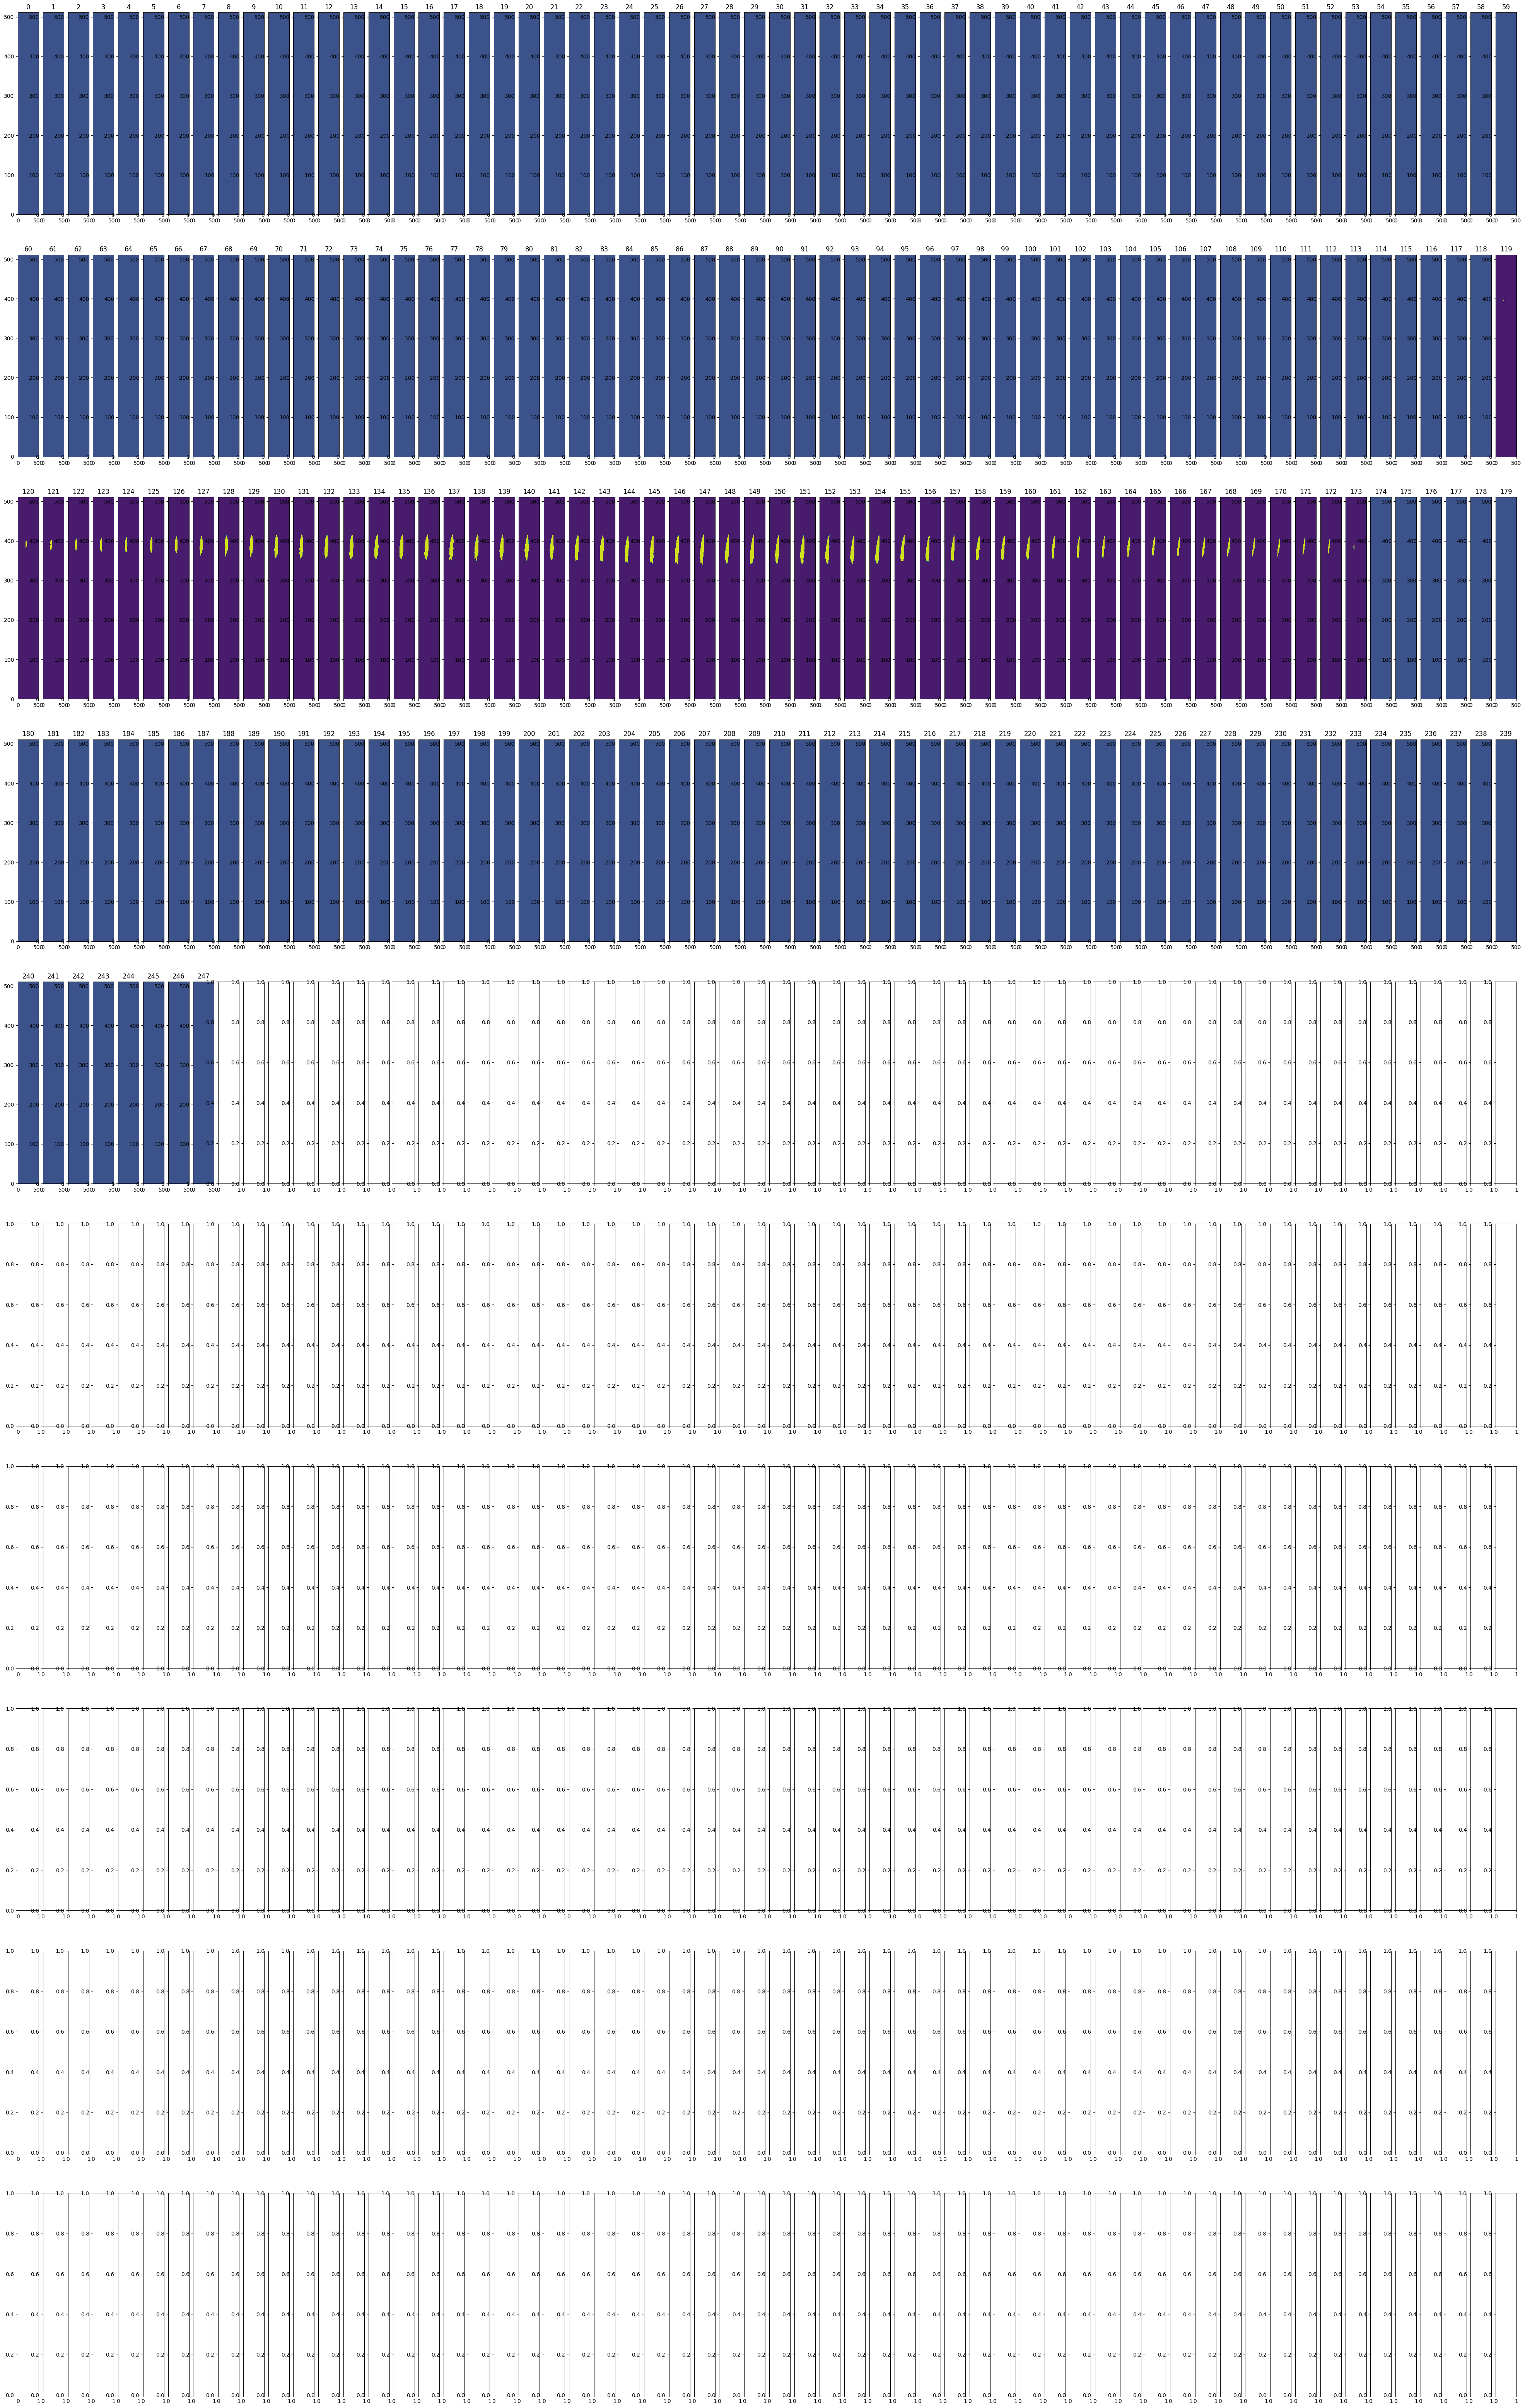

In [11]:
test_load = nib.load('/data4/hrehman/Clinical_Data/Nifti/R01-065/SEG/1.nii').get_fdata()
test_load.shape
fig, axs = plt.subplots(10,60, figsize=(50, 80), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(600):
    axs[i].contourf(test_load[:,:,i])
    axs[i].set_title(i)

In [ ]:
SEG.pixel_array[0]

In [88]:
CT_info = []
for slice in CT_001:
    CT = {
    "UID" : None,
    "file" : None
    "Location": None,
    "pixels" : None}
    CT['UID'] =  slice[0x0008, 0x0018].value
    CT['Location'] =  slice[0x0020, 0x1041].value
    CT['pixels'] =  slice.pixel_array
    CT_info.append(CT)

In [91]:
len(newlist)

304

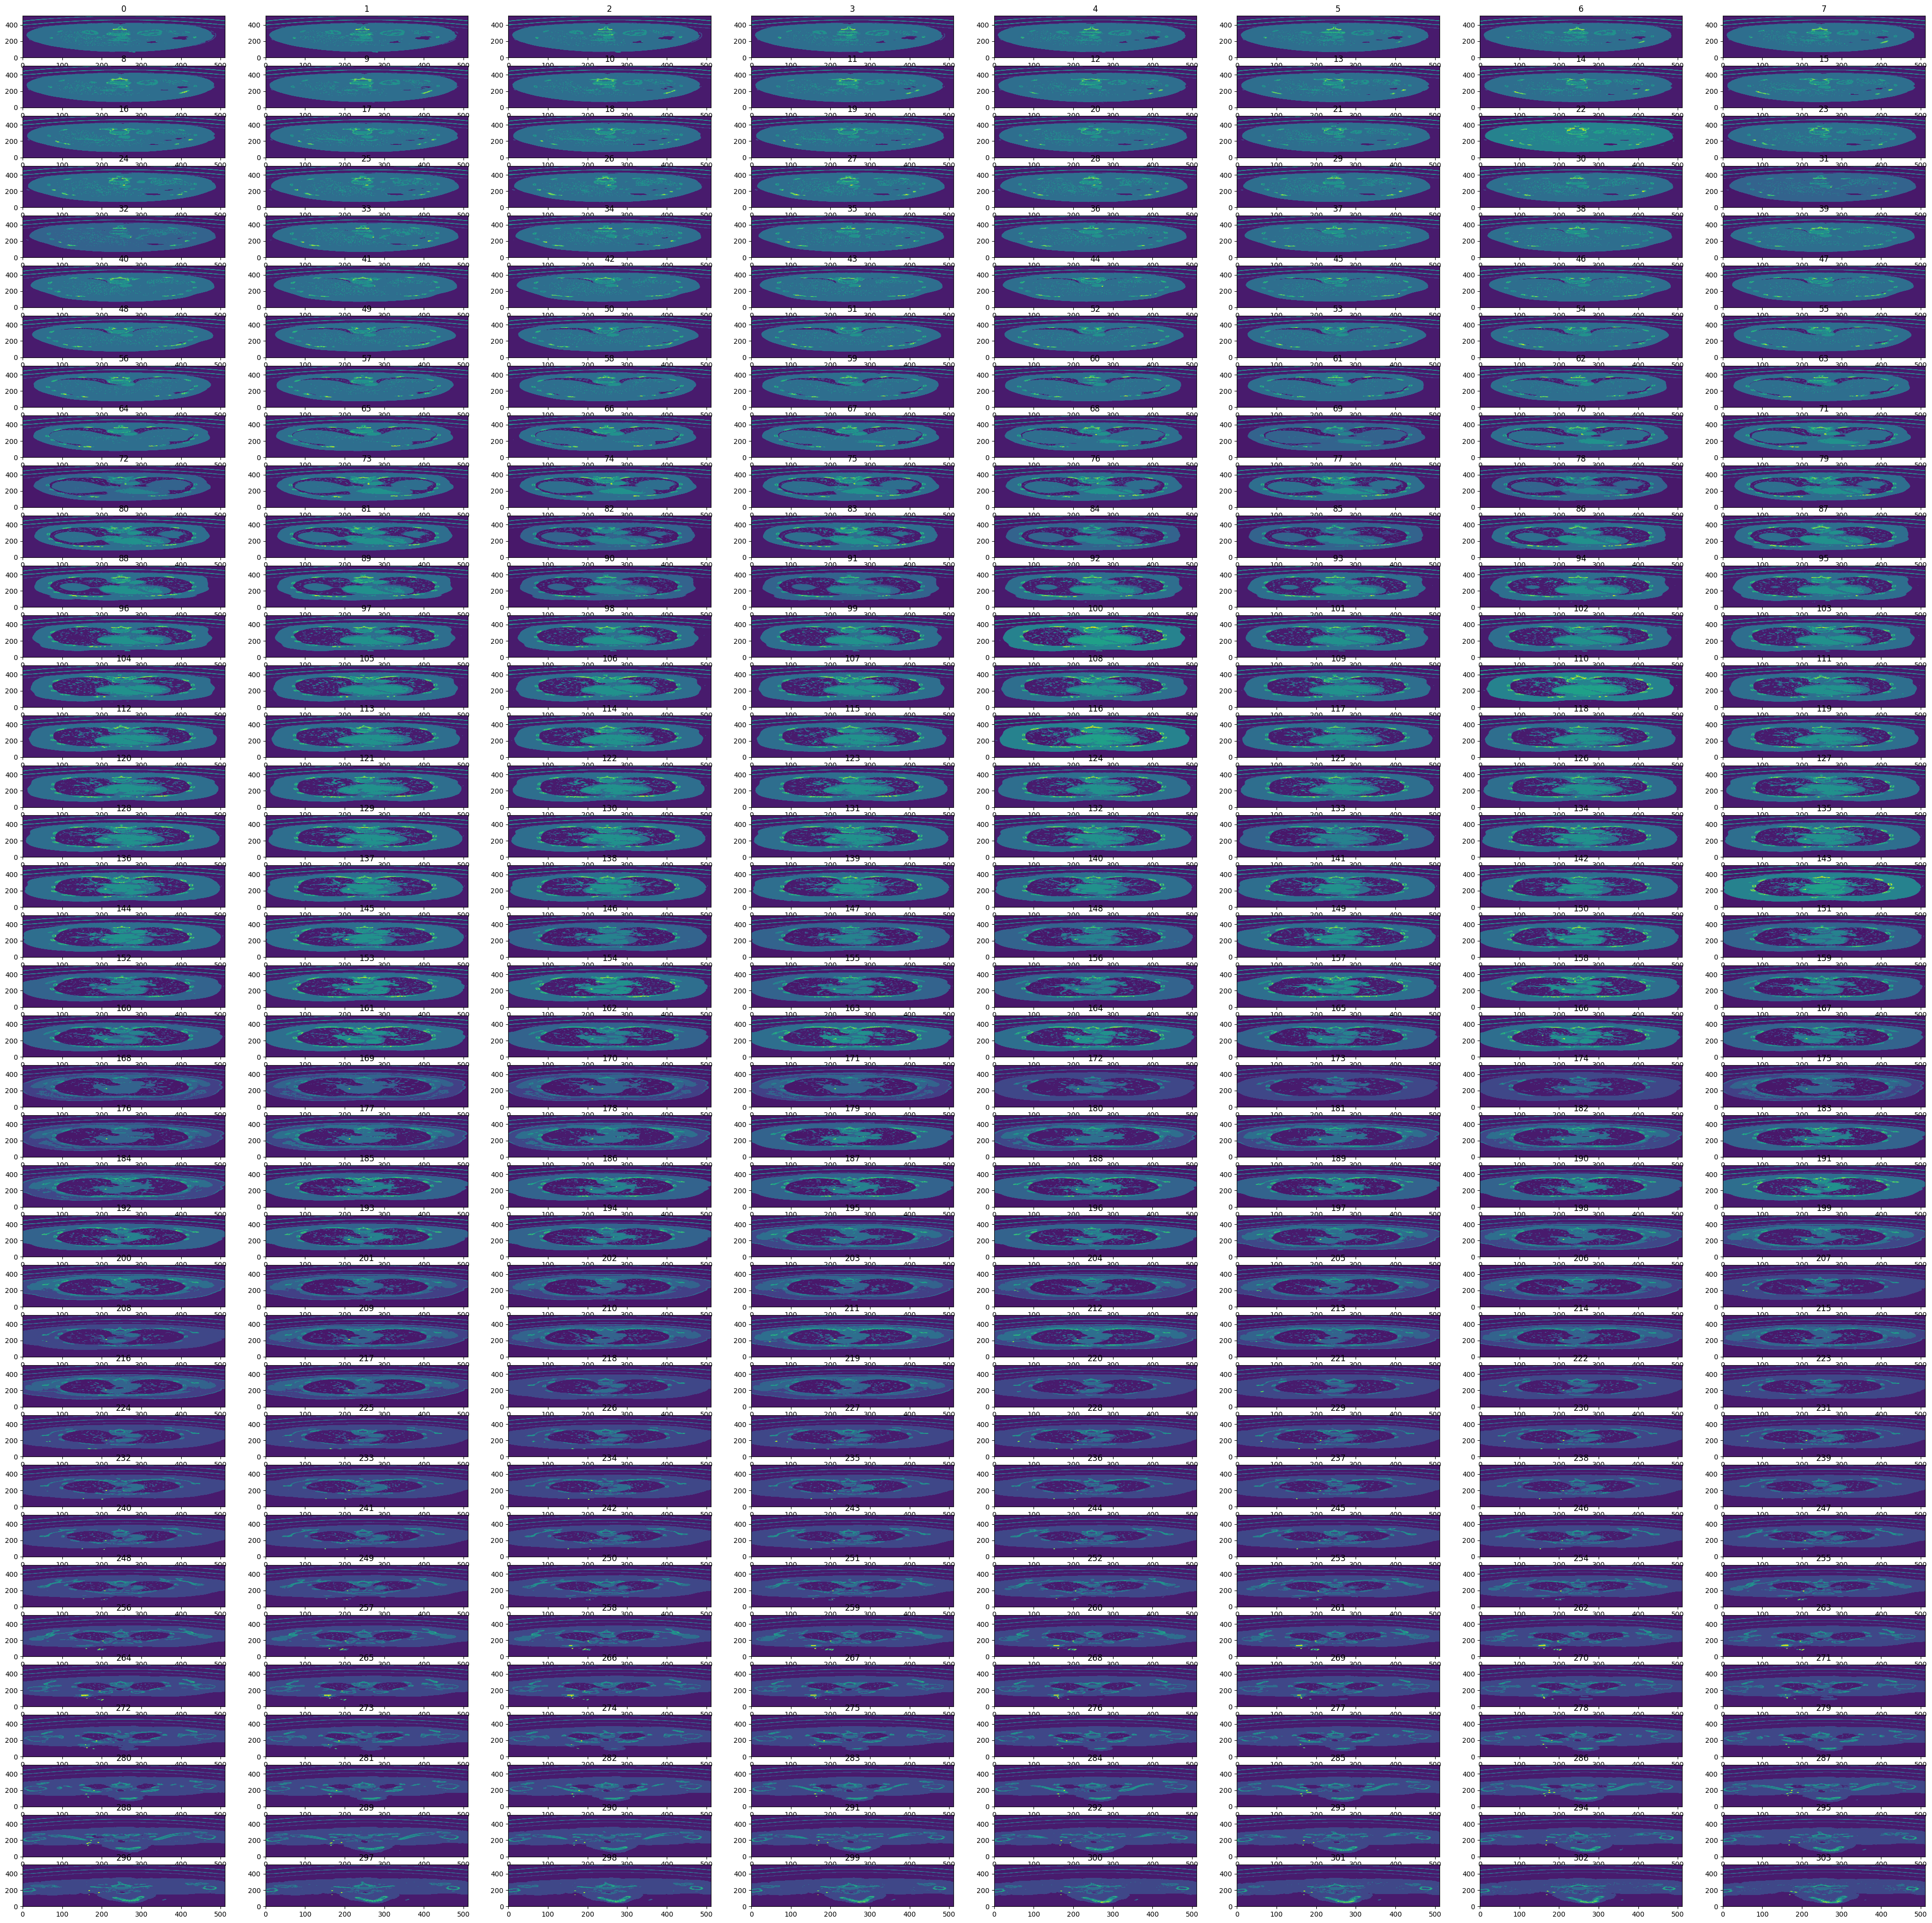

In [92]:
fig, axs = plt.subplots(38,8, figsize=(50, 50), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(304):
    axs[i].contourf(newlist[i]['pixels'])
    axs[i].set_title(i)

In [52]:
for patient in patients:
    print(patient)
    segmentaion_dict = {}
    seg_ids = []
    #get a patient segmentation
    file = os.listdir(INPUT_FOLDER + patient + '/SEG')
    path = INPUT_FOLDER + patient + '/SEG/'
    # file = os.listdir(path)
    # print(patient)

    #Read the segmentation and get the reference CT of it
    SEG = dcmread(os.path.join(path,file[0]))
    segmentations = get_reference_segmnetation(SEG)
    #populate the dictionary with the values of segmentation as 0,1,2 ....
    for i,seg in enumerate(segmentations):
        seg_ids.append(str(seg[0x0008, 0x1155].value))
        segmentaion_dict[i] = ''
    
    path = INPUT_FOLDER + patient + '/CT/'
    for file in files:
        CT = dcmread(os.path.join(path,file))
        # print(CT[0x0008, 0x0018].value)
        #read each file and find the slice number according to the SEG
        if str(CT[0x0008, 0x0018].value) in seg_ids:
            for j,v in enumerate(seg_ids):
                        # print(j,v)
                        if v == str(CT[0x0008, 0x0018].value):
                            # for all the patinets #
                            # segmentaion_dict[j] = int(file.split('-')[0])-1
                            # for some patinets as aboved mentioned
                            # print("found")
                            # print(str(file.split("-")[1]).split(".")[0])
                            # print(i)
                            segmentaion_dict[j] = int(str(file.split("-")[1]).split(".")[0])-1
    # #Write the information in a configuration file of each patient.
    # with open( BASE_PATH + "Nifti/config/" + patient + ".txt", 'w') as f: 
    #     # for key, value in segmentaion_dict.items(): 
    #     #     f.write('%s:%s\n' % (key, value))
    #     json.dump(segmentaion_dict,f)

R01-001


In [83]:
# location = []
# for slice in CT_001:
#     location.append(slice[0x0020, 0x1041].value)
#     print("Location:",slice[0x0020, 0x1041].value)
#     print("Position:",slice[0x0020, 0x0032].value)
#     if(slice[0x0020, 0x1041].value == 0):
#         print("this is on the origin")
#     if(slice[0x0020, 0x1041].value == -233):
#         print("this is on the last slice")
#     print("_____________________________")